In [41]:
import numpy as np
import pandas as pd
import math

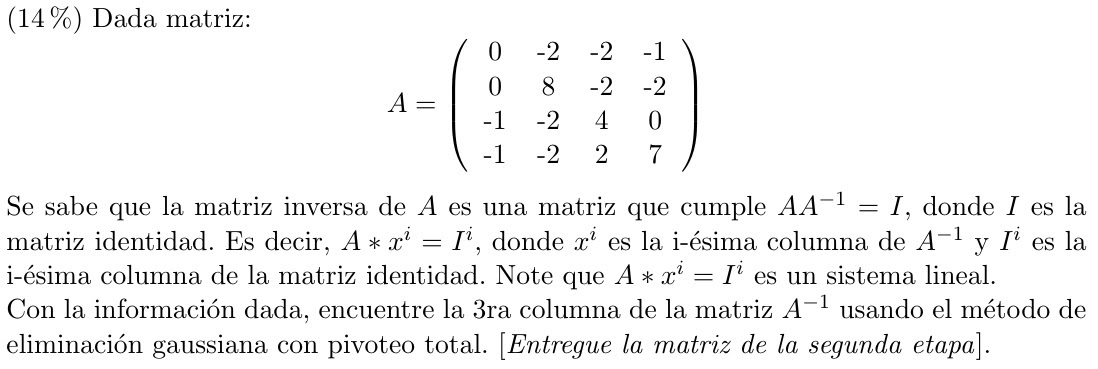

Los valores de la tercera fila de $A^-1$ son:

$X0 = -0.682927	$

$X1 = -0.012195	$

$X2 = 0.073171	$

$X3 = -0.121951	$


In [2]:
def pivot_gauss(n, augmented_matrix):
    # Applying Gauss Elimination
    x = np.zeros(n)
    swapping_list = []
    
    for i in range(n):
        
        largest = 0
        row_of_largest = 0
        column_of_largest = 0
        for j in range (i, n):
            for k in range (n):
                if abs(largest) < abs(augmented_matrix[j][k]):
                    largest = augmented_matrix[j][k]
                    row_of_largest = j
                    column_of_largest = k
                    #print (f'largest = {largest}, column = {column_of_largest}, row = {row_of_largest}')
                    
        if(row_of_largest != i or column_of_largest != i):
            augmented_matrix[[row_of_largest, i]] = augmented_matrix[[i, row_of_largest]]
            swap = [column_of_largest, i]
            swapping_list.append(swap)
            augmented_matrix[:,[i, int(column_of_largest)]] = augmented_matrix[:,[int(column_of_largest),i]]
        
        for j in range(i,n): 
            if abs(augmented_matrix[j][i]) > abs(augmented_matrix[i][i]):  
                augmented_matrix[[i,j]] = augmented_matrix[[j,i]]
            else: 
                pass  
        print(f'Pivot Etapa {i} \n{augmented_matrix}')
            
        if augmented_matrix[i][i] == 0.0:
            return None #Results in division by 0

        for j in range(i+1, n):
            ratio = augmented_matrix[j][i]/augmented_matrix[i][i]
            
            #print(augmented_matrix)
            
            for k in range(n+1):
                augmented_matrix[j][k] = augmented_matrix[j][k] - ratio * augmented_matrix[i][k]
                
        print(f'Operate Etapa {i} \n{pd.DataFrame(augmented_matrix)}')   
                
    # Back Substitution
    x[n-1] = augmented_matrix[n-1][n]/augmented_matrix[n-1][n-1]

    for i in range(n-2,-1,-1):
        x[i] = augmented_matrix[i][n]

        for j in range(i+1,n):
            x[i] = x[i] - augmented_matrix[i][j]*x[j]

        x[i] = x[i]/augmented_matrix[i][i]
    
    for i in reversed(range (len(swapping_list))):
        x[swapping_list[i][0]], x[swapping_list[i][1]] = x[swapping_list[i][1]], x[swapping_list[i][0]]
        print(x)
        
    # Displaying solution
    print('\nRequired solution is: ')
    for i in range(n):
        print('X%d = %f' %(i,x[i]), end = '\t')

In [3]:
augmented_matrix = np.array([[0, -2, -2, -1,   0],
                            [0, 8, -2, -2,     0],
                            [-1, -2, 4, 0,     1],
                            [-1, -2, 2, 7,     0]], float)
pivot_gauss(4, augmented_matrix)

Pivot Etapa 0 
[[ 8.  0. -2. -2.  0.]
 [-2.  0. -2. -1.  0.]
 [-2. -1.  4.  0.  1.]
 [-2. -1.  2.  7.  0.]]
Operate Etapa 0 
     0    1    2    3    4
0  8.0  0.0 -2.0 -2.0  0.0
1  0.0  0.0 -2.5 -1.5  0.0
2  0.0 -1.0  3.5 -0.5  1.0
3  0.0 -1.0  1.5  6.5  0.0
Pivot Etapa 1 
[[ 8.  -2.  -2.   0.   0. ]
 [ 0.   6.5  1.5 -1.   0. ]
 [ 0.  -0.5  3.5 -1.   1. ]
 [ 0.  -1.5 -2.5  0.   0. ]]
Operate Etapa 1 
     0    1         2         3    4
0  8.0 -2.0 -2.000000  0.000000  0.0
1  0.0  6.5  1.500000 -1.000000  0.0
2  0.0  0.0  3.615385 -1.076923  1.0
3  0.0  0.0 -2.153846 -0.230769  0.0
Pivot Etapa 2 
[[ 8.         -2.         -2.          0.          0.        ]
 [ 0.          6.5         1.5        -1.          0.        ]
 [ 0.          0.          3.61538462 -1.07692308  1.        ]
 [ 0.          0.         -2.15384615 -0.23076923  0.        ]]
Operate Etapa 2 
     0    1         2         3         4
0  8.0 -2.0 -2.000000  0.000000  0.000000
1  0.0  6.5  1.500000 -1.000000  0.000000

# Complete la tabla de diferencias divididas

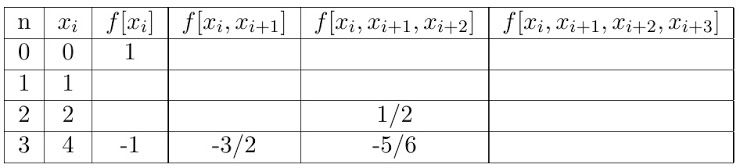

Calculamos a mano los suficientes valores para completar $f(x)$ y ya usamos el algorítmo.

| $n$ | $x_i$   | $f(x_i)$ | $f(x_i, x_{i+1})$   | $f(x_i, x_{i+1}, x_{i+2})$ | $f(x_i, x_{i+1}, x_{i+2}, x_{i+3})$   |
|------|------|------|------|------|------|
|0 | 0| 1 |   0  | 0 | 0 |
| 1| 1|  1 |  0   | 0 | 0 |
| 2| 2|  2 |  1   | 1/2 | 0 |
| 3| 4| -1| -3/2| -5/6 | -1/3 |

In [11]:
def get_diff_table(X,Y):
    """
         Get the market insert
    """
    n=len(X)
    A=np.zeros([n,n])
    
    for i in range(0,n):
        A[i][0] = Y[i]
    
    for j in range(1,n):
        for i in range(j,n):
            A[i][j] = (A[i][j-1] - A[i-1][j-1])/(X[i]-X[i-j])
    
    return A

X = np.array([0, 1, 2, 4])
Y = np.array([1, 1, 2, -1])
get_diff_table(X,Y)

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 2.        ,  1.        ,  0.5       ,  0.        ],
       [-1.        , -1.5       , -0.83333333, -0.33333333]])

## Dado el siguiente sistema lineal, halle el w que garantiza la convergencia más rápida para el método de SOR. ¿Cuál es el radio espectral de la T asociada?
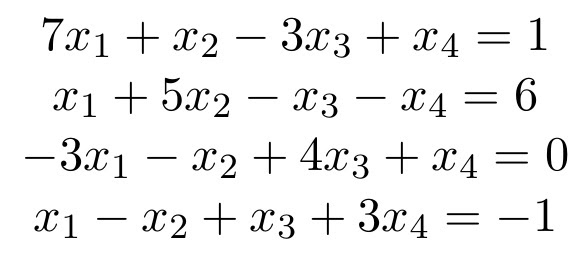

## La temperatura en una placa uniforme se puede aproximar al dividir la placa como una red de secciones igualmente espaciadas. En cada punto interno, la temperatura se toma como el promedio de las temperaturas de sus 4 puntos adyacentes. La placa tiene temperatura constante en los puntos de la frontera.

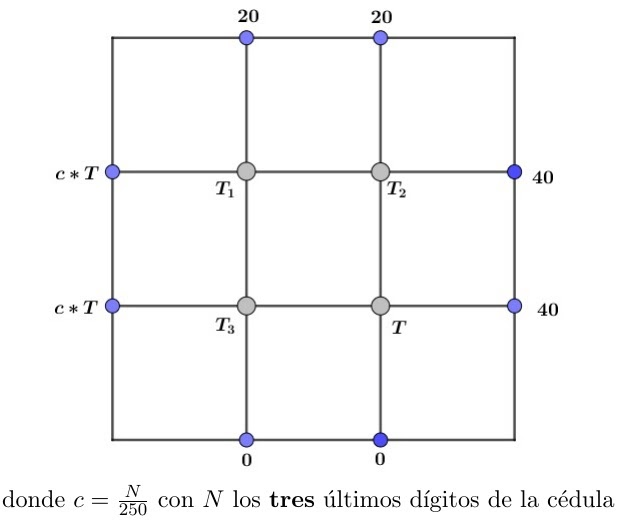

In [12]:
N = 23

## Se toma la temperatura (en Celsius) en una habitación cada 6 horas, como se muestra en la tabla. Queremos saber los valores de h para los que la temperatura es cero.

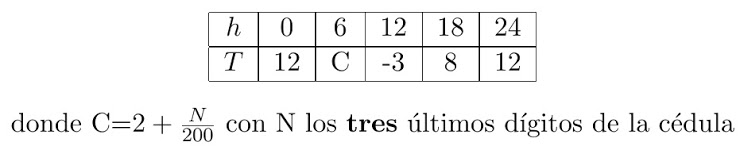

In [20]:
def pivot_gauss(n, augmented_matrix):
    # Applying Gauss Elimination
    x = np.zeros(n)
    swapping_list = []
    
    for i in range(n):
        
        largest = 0
        row_of_largest = 0
        column_of_largest = 0
        for j in range (i, n):
            for k in range (n):
                if abs(largest) < abs(augmented_matrix[j][k]):
                    largest = augmented_matrix[j][k]
                    row_of_largest = j
                    column_of_largest = k
                    #print (f'largest = {largest}, column = {column_of_largest}, row = {row_of_largest}')
                    
        if(row_of_largest != i or column_of_largest != i):
            augmented_matrix[[row_of_largest, i]] = augmented_matrix[[i, row_of_largest]]
            swap = [column_of_largest, i]
            swapping_list.append(swap)
            augmented_matrix[:,[i, int(column_of_largest)]] = augmented_matrix[:,[int(column_of_largest),i]]
        
        for j in range(i,n): 
            if abs(augmented_matrix[j][i]) > abs(augmented_matrix[i][i]):  
                augmented_matrix[[i,j]] = augmented_matrix[[j,i]]
            else: 
                pass  
        print(f'Pivot Etapa {i} \n{augmented_matrix}')
            
        if augmented_matrix[i][i] == 0.0:
            return None #Results in division by 0

        for j in range(i+1, n):
            ratio = augmented_matrix[j][i]/augmented_matrix[i][i]
            
            #print(augmented_matrix)
            
            for k in range(n+1):
                augmented_matrix[j][k] = augmented_matrix[j][k] - ratio * augmented_matrix[i][k]
                
        print(f'Operate Etapa {i} \n{pd.DataFrame(augmented_matrix)}')   
                
    # Back Substitution
    x[n-1] = augmented_matrix[n-1][n]/augmented_matrix[n-1][n-1]

    for i in range(n-2,-1,-1):
        x[i] = augmented_matrix[i][n]

        for j in range(i+1,n):
            x[i] = x[i] - augmented_matrix[i][j]*x[j]

        x[i] = x[i]/augmented_matrix[i][i]
    
    for i in reversed(range (len(swapping_list))):
        x[swapping_list[i][0]], x[swapping_list[i][1]] = x[swapping_list[i][1]], x[swapping_list[i][0]]
        print(x)
        
    # Displaying solution
    print('\nRequired solution is: ')
    for i in range(n):
        print('X%d = %f' %(i,x[i]), end = '\t')

In [35]:
h = np.array([0, 6, 12, 18, 24])
T = np.array([[12], [23], [-3], [8], [12]])
b = np.array([12, 23, -3, 8, 12])

vander = np.vander(h)

In [36]:
np.linalg.solve(vander, b)

array([-3.79372428e-03,  1.93672840e-01, -3.04398148e+00,  1.39444444e+01,
        1.20000000e+01])

In [39]:
def p(x):
    return -3.79372428e-03*(math.pow(x, 4)) + 1.93672840e-01*(math.pow(x, 3)) - 3.04398148e+00*(math.pow(x, 2)) + 1.39444444e+01*(x) + 1.20000000e+01

In [37]:
def secant(f, x0, x1, tolerance, max_iterations):
    
    pd.set_option("display.precision", 8)
    data = {'n': [0, 1],
         'Xn': [x0, x1],
        'f(xn)': [f(x0), f(x1)],
        'E': [None, None],}
    output = pd.DataFrame(data)
    
    n = 2
    previous_x = x1
    previous_previous_x = x0
    
    while n < max_iterations:
        
        current_x = previous_x - ((f(previous_x)*(previous_x - previous_previous_x))/(f(previous_x) - f(previous_previous_x)))
        err = abs(current_x-previous_x)
        previous_previous_x = previous_x
        previous_x = current_x
        
        new_line = {'n':n,
            'Xn': current_x,
            'f(xn)':f(current_x),
            'E':err,}

        output = output.append(new_line, ignore_index=True)
        
        if err <= tolerance:
            break
            
        n += 1
        
    print (output)

In [43]:
secant(p, 7, 9, 0.0000001, 100)

     n           Xn           f(xn)           E
0  0.0   7.00000000  1.77770704e+01         NaN
1  1.0   9.00000000  7.23437508e+00         NaN
2  2.0  10.37239574  1.35928566e+00  1.37239574
3  3.0  10.68991905  2.62666317e-01  0.31752331
4  4.0  10.76597341  1.67027401e-02  0.07605436
5  5.0  10.77113806  2.39425260e-04  0.00516465
6  6.0  10.77121317  2.25611814e-07  0.00007511
7  7.0  10.77121324  3.12638804e-12  0.00000007


In [44]:
p(60)

-17442.999892799995